EXERCISE 1-

*   YAEL KELLER
*   OFRI NUSSEL
*   ASAF SOFER
*   TOMER BLUMENTAL
*   NETA COHEN









In the upcoming project, our goal is to predict the daily number of rented bicycles. We'll showcase the dataset manipulations implemented during the project .Successful strategies that led to score improvement, along with the approaches that did not yield positive results.



# Import packages

In [1]:
# import packages
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from math import sin, cos, radians
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost as xgb
from math import sqrt
import time
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import os


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Checking the runtime

In [2]:
# Record the start time
start_time = time.time()

# Loading Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,35
1,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,251
2,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,53
3,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,296
4,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,38
8160,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,149
8161,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,234
8162,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,22


In [4]:
test_df = pd.read_csv('https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/test.csv')
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
0,2011-07-19 11:00:00,3,0,1,1,33.62,40.150,59,0.0000,10.317020,33.621,0.015615,127
1,2012-01-16 06:00:00,1,1,0,1,4.10,6.820,54,6.0032,3.502209,4.101,0.004489,13
2,2011-12-11 18:00:00,4,0,0,1,9.84,11.365,48,12.9980,25.945915,9.841,0.000000,163
3,2012-08-15 10:00:00,3,0,1,2,29.52,34.090,62,12.9980,116.935908,29.521,0.004489,233
4,2012-06-15 23:00:00,2,0,1,1,25.42,31.060,53,16.9979,120.824789,25.421,0.015615,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,2011-03-19 15:00:00,1,0,0,1,20.50,24.240,29,27.9993,44.665581,20.501,0.000242,313
2718,2012-01-08 16:00:00,1,0,0,1,16.40,20.455,37,19.9995,31.090380,16.401,0.000000,314
2719,2011-07-11 05:00:00,3,0,1,1,27.06,31.060,74,8.9981,1.075298,27.061,0.015615,26
2720,2011-07-16 08:00:00,3,0,0,1,27.06,31.060,65,11.0014,2.291586,27.061,0.004489,127


In [5]:
# split to data (x) and label (y) of train data
x_train = df.drop(['count'], axis=1)
y_train = df[['count']]
x_train, y_train

(                 datetime  season  holiday  workingday  weather   temp  \
 0     2011-07-11 00:00:00       3        0           1        1  28.70   
 1     2012-05-18 22:00:00       2        0           1        1  22.96   
 2     2011-04-01 23:00:00       2        0           1        1  12.30   
 3     2012-09-16 09:00:00       3        0           0        1  23.78   
 4     2011-02-01 23:00:00       1        0           1        3   8.20   
 ...                   ...     ...      ...         ...      ...    ...   
 8159  2012-01-14 02:00:00       1        0           0        1   6.56   
 8160  2011-12-10 09:00:00       4        0           0        1  11.48   
 8161  2011-12-18 16:00:00       4        0           0        1  11.48   
 8162  2011-02-19 07:00:00       1        0           0        1  15.58   
 8163  2012-05-02 07:00:00       2        0           1        2  22.14   
 
        atemp  humidity  windspeed  pollution  sunlight   traffic  
 0     32.575        65    12.

In [6]:
# split to data (x) and label (y) of test data
x_test = test_df.drop(['count'], axis=1)
y_test = test_df[['count']]
x_test, y_test

(                 datetime  season  holiday  workingday  weather   temp  \
 0     2011-07-19 11:00:00       3        0           1        1  33.62   
 1     2012-01-16 06:00:00       1        1           0        1   4.10   
 2     2011-12-11 18:00:00       4        0           0        1   9.84   
 3     2012-08-15 10:00:00       3        0           1        2  29.52   
 4     2012-06-15 23:00:00       2        0           1        1  25.42   
 ...                   ...     ...      ...         ...      ...    ...   
 2717  2011-03-19 15:00:00       1        0           0        1  20.50   
 2718  2012-01-08 16:00:00       1        0           0        1  16.40   
 2719  2011-07-11 05:00:00       3        0           1        1  27.06   
 2720  2011-07-16 08:00:00       3        0           0        1  27.06   
 2721  2011-01-01 12:00:00       1        0           0        1  17.22   
 
        atemp  humidity  windspeed   pollution  sunlight   traffic  
 0     40.150        59     0

# Exploring the data

In [7]:
feature_types = df.dtypes
print(feature_types)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
pollution     float64
sunlight      float64
traffic       float64
count           int64
dtype: object


We can see that the type of the features makes sense, the categorical features are numeric, first we will try to keep them like that and later we will change them using one-hot encoding.

In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,count
count,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.510289,0.029397,0.683244,1.415483,20.244980,23.670160,61.835130,12.791334,47.152120,20.245980,0.004986,191.339784
std,1.117178,0.168928,0.465240,0.631242,7.796018,8.468725,19.255791,8.213914,72.882602,7.796018,0.006319,181.143178
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000304,0.821000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,3.693188,13.941000,0.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.684113,20.501000,0.000242,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,59.257746,26.241000,0.004489,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,754.304876,41.001000,0.015615,970.000000


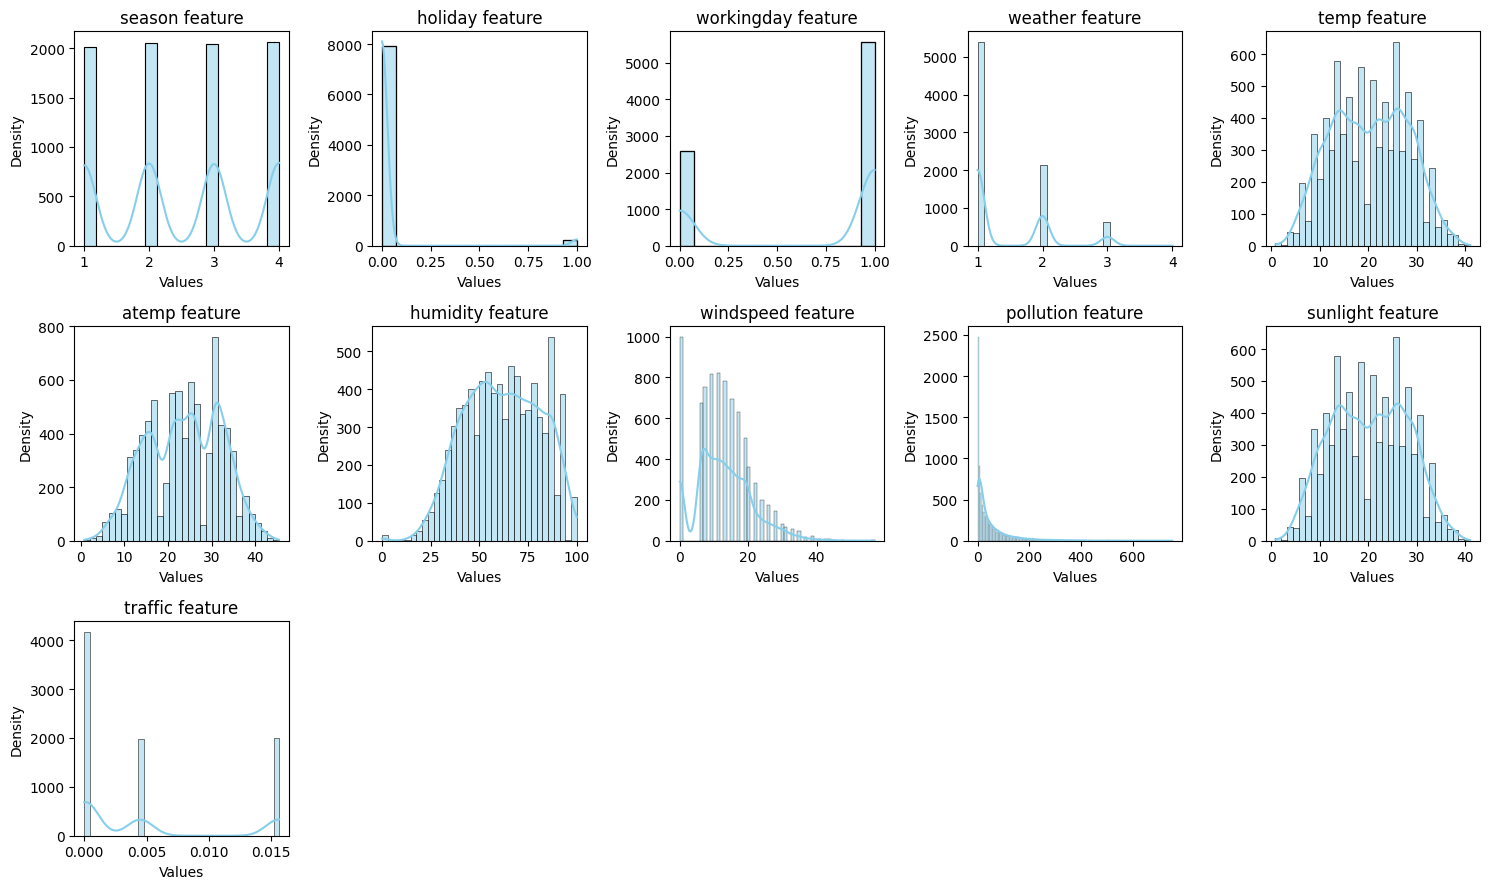

In [9]:
def distribution_plot(x_train):
    # Get the numeric column names
    numeric_columns = x_train.select_dtypes(include=np.number).columns

    # Calculate the number of numeric plots
    num_plots = len(numeric_columns)

    # Calculate the number of rows and columns for subplots
    num_rows = int(np.ceil(num_plots / 5))
    num_cols = min(num_plots, 5)

    # Create a figure and subplots with adjusted size and spacing
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

    # Track the subplot index
    subplot_index = 0

    # Iterate through the subplots
    for i in range(num_rows):
        for j in range(num_cols):
            if subplot_index < num_plots:
                column = numeric_columns[subplot_index]

                # Generate the plot for each numeric column
                sns.histplot(x_train[column], kde=True, ax=axes[i, j], color='skyblue')

                # Customize each subplot
                axes[i, j].set_title(f'{column} feature')
                axes[i, j].set_xlabel('Values')
                axes[i, j].set_ylabel('Density')

                # Increment the subplot index
                subplot_index += 1
            else:
                # If there are fewer columns than subplots, remove the unused subplots
                fig.delaxes(axes[i, j])

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the plot
    plt.show()

distribution_plot(x_train)


From the results of the graphs, several insights can be gleaned. Firstly, there are variables whose distribution closely approximates a normal distribution (such as temp, atemp, sunlight, humidity). These are variables expected to exhibit such behavior, and if they deviate significantly from normality, it would raise suspicion. Additionally, cyclic variables (such as season) display the expected cyclic patterns.

For binary variables, the distribution can indicate whether there is an equal distribution between the two values or if there is a pronounced majority for a specific binary value (such as holiday).

## Correlation Matrix

<ipython-input-10-db8839ca2135>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<Axes: title={'center': 'Pearson Correlation Heatmap'}>

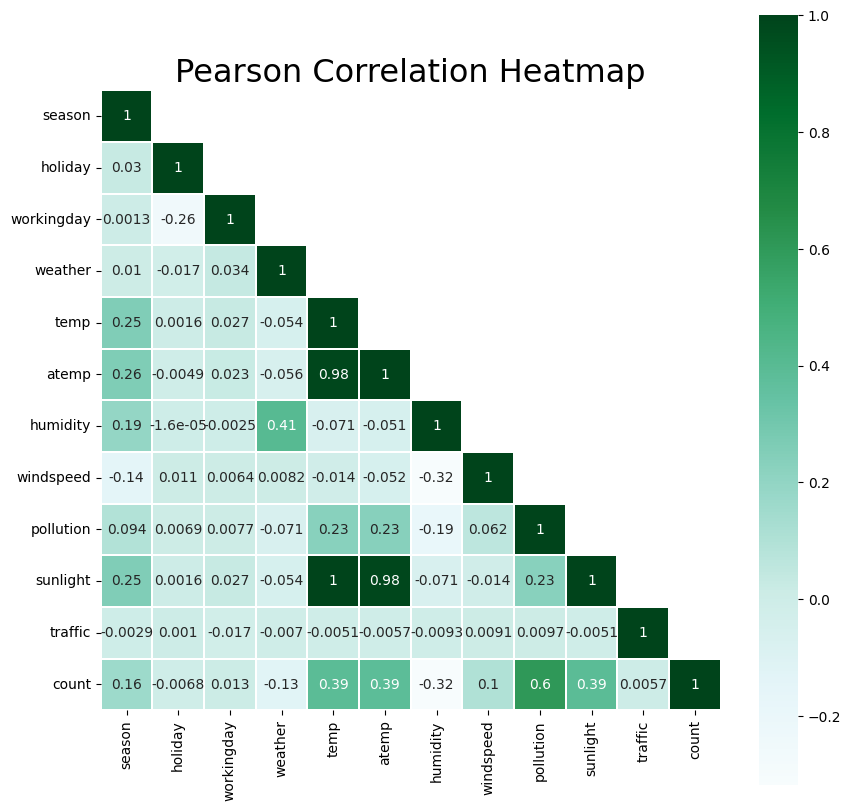

In [10]:
correlations = df.corr()

mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Pearson Correlation Heatmap', fontsize=23)

sns.heatmap(correlations, linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask)

Based on the correlation heatmap, it is evident that there is a particularly high compatibility between the variables 'temp,' 'atemp,' and 'sunlight.' Therefore, these variables should be given special attention during the process. Additionally, a substantial correlation is observed between 'temp' and 'atemp.'
Another noteworthy observation is the relatively high compatibility percentages between the labels and the variables 'temp,' 'atemp,' 'pollution,' and 'sunlight.' It's worth mentioning that 'humidity' and 'weather' are also correlated.


Since the meanings of 'weather,' 'season,' 'temp,' and 'atemp' are closely related, we have opted to examine the correlation between these variables.

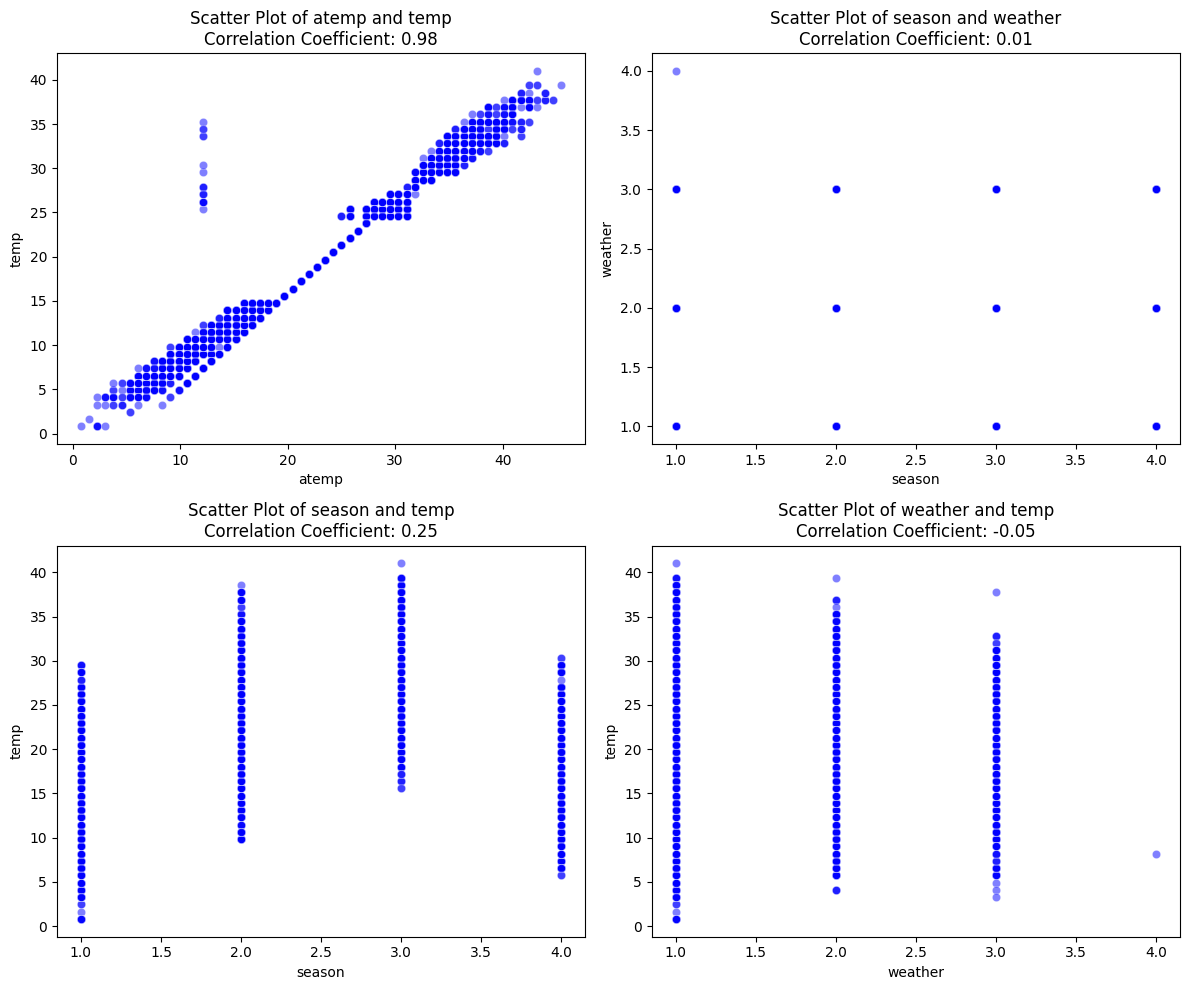

In [11]:


# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1
sns.scatterplot(x='atemp', y='temp', data=df, color='blue', alpha=0.5, ax=axes[0, 0])
correlation_coefficient_1 = df['atemp'].corr(df['temp'])
axes[0, 0].set_title(f'Scatter Plot of atemp and temp\nCorrelation Coefficient: {correlation_coefficient_1:.2f}')

# Plot 2
sns.scatterplot(x='season', y='weather', data=df, color='blue', alpha=0.5, ax=axes[0, 1])
correlation_coefficient_2 = df['season'].corr(df['weather'])
axes[0, 1].set_title(f'Scatter Plot of season and weather\nCorrelation Coefficient: {correlation_coefficient_2:.2f}')

# Plot 3
sns.scatterplot(x='season', y='temp', data=df, color='blue', alpha=0.5, ax=axes[1, 0])
correlation_coefficient_3 = df['season'].corr(df['temp'])
axes[1, 0].set_title(f'Scatter Plot of season and temp\nCorrelation Coefficient: {correlation_coefficient_3:.2f}')

# Plot 4
sns.scatterplot(x='weather', y='temp', data=df, color='blue', alpha=0.5, ax=axes[1, 1])
correlation_coefficient_4 = df['weather'].corr(df['temp'])
axes[1, 1].set_title(f'Scatter Plot of weather and temp\nCorrelation Coefficient: {correlation_coefficient_4:.2f}')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Based on the graphs, it is evident that the correlation between 'temp' and 'atemp' is nearly perfect. Considering this, we may choose to drop one of them in the process to avoid redundancy or multicollinearity.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8164 non-null   object 
 1   season      8164 non-null   int64  
 2   holiday     8164 non-null   int64  
 3   workingday  8164 non-null   int64  
 4   weather     8164 non-null   int64  
 5   temp        8164 non-null   float64
 6   atemp       8164 non-null   float64
 7   humidity    8164 non-null   int64  
 8   windspeed   8164 non-null   float64
 9   pollution   8164 non-null   float64
 10  sunlight    8164 non-null   float64
 11  traffic     8164 non-null   float64
 12  count       8164 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 829.3+ KB


There are no missing values.

# Initial Feature Engineering

## Handeling 'datetime' feature

Handling the 'datetime' column involves transforming it into four separate columns to facilitate model processing. These new columns would represent the rental hour, day of the week, month, and year. This restructuring allows the model to better handle the temporal information in a more digestible format.

In [13]:

def datetime_to_numerical(x_train):
    # Convert the 'datetime' column to a pandas datetime object
    x_train['datetime'] = pd.to_datetime(x_train['datetime'])

    # Extract features
    x_train['rent_hour'] = x_train['datetime'].dt.hour
    x_train['day_of_week'] = x_train['datetime'].dt.dayofweek  # Monday is 0 and Sunday is 6
    x_train['month'] = x_train['datetime'].dt.month  # 1 to 12 representing January to December
    x_train['year']=x_train['datetime'].dt.year

    # Drop the original 'datetime' column
    x_train = x_train.drop("datetime", axis=1)

    return x_train


In [14]:
x_train = datetime_to_numerical(x_train)

In [15]:
x_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,pollution,sunlight,traffic,rent_hour,day_of_week,month,year
0,3,0,1,1,28.70,32.575,65,12.9980,5.354100,28.701,0.000000,0,0,7,2011
1,2,0,1,1,22.96,26.515,52,22.0028,85.425233,22.961,0.004489,22,4,5,2012
2,2,0,1,1,12.30,15.910,61,6.0032,2.040899,12.301,0.000242,23,4,4,2011
3,3,0,0,1,23.78,27.275,60,8.9981,26.682772,23.781,0.004489,9,6,9,2012
4,1,0,1,3,8.20,9.850,93,12.9980,5.851754,8.201,0.000000,23,1,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,1,0,0,1,6.56,8.335,47,11.0014,14.953355,6.561,0.004489,2,5,1,2012
8160,4,0,0,1,11.48,12.880,61,19.0012,7.977025,11.481,0.000000,9,5,12,2011
8161,4,0,0,1,11.48,13.635,48,16.9979,6.916512,11.481,0.015615,16,6,12,2011
8162,1,0,0,1,15.58,19.695,17,35.0008,0.095445,15.581,0.000242,7,5,2,2011


##Normalization

We decided to not normlize the data becasue normalizing data is generally unnecessary for tree models like decision trees, random forests and gradient boosting. These models base decisions on feature relationships, not magnitudes, and remain unaffected by scale changes.

#Models- First Attempt

It's a thoughtful choice to employ a mix of models such as Linear Regression, Random Forest, and XGBoost. Random Forest and XGBoost, being tree-based models, are suitable for tabular data and can capture complex relationships. Linear Regression, on the other hand, offers simplicity and transparency, providing a different perspective and allowing for easier interpretation of the relationships between variables. This diverse set of models allows for a more comprehensive understanding of the data and enhances the robustness of your analysis.

Running the models that we selected for the first time before implementing feature engineering

In [16]:
models_first_try = {'Random_forest': None,
          'Linear_regression': None,
          'xgboost': None}

#Linear regression

In [17]:
def linear_regression(x_train, y_train):
  lr = LinearRegression()
  lr.fit(x_train, np.ravel(y_train))
  cv_score = cross_val_score(lr, x_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
  return lr, cv_score


#Random forest

In [18]:
def random_forest(x_train, y_train):

    rf = RandomForestRegressor(n_estimators=300, random_state=42)

    param_grid = {
        'max_features': ['auto', 'sqrt', 'log2', 1/3],
        #'criterion': ['mse', 'mae'],
        'max_depth': [None, 10, 20, 30]
    }

    tuned_rf = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',
        cv=3, #number of Kfolds
        verbose=3,
        refit=True
    )

    tuned_rf.fit(x_train, y_train)
    return tuned_rf

#XGboost

In [19]:
def xgboost(x_train, y_train):
    # Convert the data to DMatrix format used by XGBoost
    dmatrix = xgb.DMatrix(x_train, label=y_train)

    # Define the parameters for XGBoost
    param_grid = {
        'objective': ['reg:squarederror'],  # For regression tasks
        'eval_metric': ['rmse'],  # Root Mean Squared Error
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1, 0.2],

    }

    xgb_model = xgb.XGBRegressor(random_state=42)

    tuned_xgb = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',
        cv=3,  # Number of folds
        verbose=3,
        refit=True
    )

    tuned_xgb.fit(x_train, y_train)

    return tuned_xgb


#Run Models

In [20]:
#intput- x,y
#output- dictionary with the trained models
def run_models(x, y):
  models_dict = {}
  models_dict['Random forest'] = random_forest(x, y)
  models_dict['xgboost'] = xgboost(x, y)
  models_dict['Linear regression'] = linear_regression(x, y)
  return models_dict

In [21]:
models_first_try = run_models(x_train, y_train.values.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto;, score=-53.458 total time=  14.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto;, score=-57.590 total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto;, score=-55.341 total time=   7.1s
[CV 1/3] END max_depth=None, max_features=sqrt;, score=-76.422 total time=   2.6s
[CV 2/3] END max_depth=None, max_features=sqrt;, score=-80.541 total time=   2.2s
[CV 3/3] END max_depth=None, max_features=sqrt;, score=-78.827 total time=   2.2s
[CV 1/3] END max_depth=None, max_features=log2;, score=-76.422 total time=   2.2s
[CV 2/3] END max_depth=None, max_features=log2;, score=-80.541 total time=   2.3s
[CV 3/3] END max_depth=None, max_features=log2;, score=-78.827 total time=   2.5s
[CV 1/3] END max_depth=None, max_features=0.3333333333333333;, score=-66.959 total time=   3.1s
[CV 2/3] END max_depth=None, max_features=0.3333333333333333;, score=-70.112 total time=   3.1s
[CV 3/3] END max_depth=None, max_features=0.3333333333333333;, score=-70.875 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=10, max_features=auto;, score=-61.231 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=10, max_features=auto;, score=-64.521 total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=10, max_features=auto;, score=-64.061 total time=   5.2s
[CV 1/3] END .max_depth=10, max_features=sqrt;, score=-87.247 total time=   1.5s
[CV 2/3] END .max_depth=10, max_features=sqrt;, score=-90.611 total time=   1.4s
[CV 3/3] END .max_depth=10, max_features=sqrt;, score=-89.297 total time=   1.5s
[CV 1/3] END .max_depth=10, max_features=log2;, score=-87.247 total time=   1.5s
[CV 2/3] END .max_depth=10, max_features=log2;, score=-90.611 total time=   1.6s
[CV 3/3] END .max_depth=10, max_features=log2;, score=-89.297 total time=   1.6s
[CV 1/3] END max_depth=10, max_features=0.3333333333333333;, score=-78.928 total time=   2.0s
[CV 2/3] END max_depth=10, max_features=0.3333333333333333;, score=-80.642 total time=   2.1s
[CV 3/3] END max_depth=10, max_features=0.3333333333333333;, score=-80.685 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=20, max_features=auto;, score=-53.480 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=20, max_features=auto;, score=-57.646 total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=20, max_features=auto;, score=-55.304 total time=   7.0s
[CV 1/3] END .max_depth=20, max_features=sqrt;, score=-77.271 total time=   2.2s
[CV 2/3] END .max_depth=20, max_features=sqrt;, score=-80.922 total time=   2.5s
[CV 3/3] END .max_depth=20, max_features=sqrt;, score=-78.723 total time=   2.2s
[CV 1/3] END .max_depth=20, max_features=log2;, score=-77.271 total time=   2.2s
[CV 2/3] END .max_depth=20, max_features=log2;, score=-80.922 total time=   2.2s
[CV 3/3] END .max_depth=20, max_features=log2;, score=-78.723 total time=   2.2s
[CV 1/3] END max_depth=20, max_features=0.3333333333333333;, score=-67.412 total time=   3.4s
[CV 2/3] END max_depth=20, max_features=0.3333333333333333;, score=-69.231 total time=   3.0s
[CV 3/3] END max_depth=20, max_features=0.3333333333333333;, score=-69.310 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=30, max_features=auto;, score=-53.451 total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=30, max_features=auto;, score=-57.591 total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=30, max_features=auto;, score=-55.326 total time=   7.2s
[CV 1/3] END .max_depth=30, max_features=sqrt;, score=-76.309 total time=   2.3s
[CV 2/3] END .max_depth=30, max_features=sqrt;, score=-80.541 total time=   2.8s
[CV 3/3] END .max_depth=30, max_features=sqrt;, score=-78.854 total time=   2.2s
[CV 1/3] END .max_depth=30, max_features=log2;, score=-76.309 total time=   2.2s
[CV 2/3] END .max_depth=30, max_features=log2;, score=-80.541 total time=   2.2s
[CV 3/3] END .max_depth=30, max_features=log2;, score=-78.854 total time=   2.2s
[CV 1/3] END max_depth=30, max_features=0.3333333333333333;, score=-67.035 total time=   3.4s
[CV 2/3] END max_depth=30, max_features=0.3333333333333333;, score=-70.025 total time=   3.1s
[CV 3/3] END max_depth=30, max_features=0.3333333333333333;, score=-70.828 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-86.011 total time=   0.1s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-85.576 total time=   0.1s
[CV 3/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-86.860 total time=   0.1s
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-60.304 total time=   0.1s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-58.347 total time=   0.1s
[CV 3/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-59.087 total time=   0.1s
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=7, objective=reg:squarederror;, score=-48.691 total time=   0.2s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_dep

Lets take a look at the results:

In [22]:
cv_scores = {}
cv_scores['Random forest'] = models_first_try['Random forest'].best_score_
cv_scores['xgboost'] = models_first_try['xgboost'].best_score_
cv_scores['Linear regression'] = models_first_try['Linear regression'][1].mean()
cv_scores

{'Random forest': -55.45619530825923,
 'xgboost': -45.35644188287225,
 'Linear regression': -121.95013181883675}

In [23]:
models_first_try['Random forest'].best_params_

{'max_depth': 30, 'max_features': 'auto'}

In [24]:

models_first_try['xgboost'].best_params_

{'eval_metric': 'rmse',
 'learning_rate': 0.1,
 'max_depth': 7,
 'objective': 'reg:squarederror'}

Seems like the best model so far is xgboost with rmse of 45.35

#Continuing with the feature engineering process

We decided to drop the following features due to the results in the correlation heatmap. We'd also rather working with "temp" feature (that we're familliar with). Changing only the x_train

In [25]:
def drop_features(x_train,lst):
  for feature in lst:
    x_train = x_train.drop(feature ,axis=1)
  return x_train



In [26]:
x_train = drop_features(x_train,['atemp','sunlight'])
x_train

,season,holiday,workingday,weather,temp,humidity,windspeed,pollution,traffic,rent_hour,day_of_week,month,year
0,3,0,1,1,28.70,65,12.9980,5.354100,0.000000,0,0,7,2011
1,2,0,1,1,22.96,52,22.0028,85.425233,0.004489,22,4,5,2012
2,2,0,1,1,12.30,61,6.0032,2.040899,0.000242,23,4,4,2011
3,3,0,0,1,23.78,60,8.9981,26.682772,0.004489,9,6,9,2012
4,1,0,1,3,8.20,93,12.9980,5.851754,0.000000,23,1,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,1,0,0,1,6.56,47,11.0014,14.953355,0.004489,2,5,1,2012
8160,4,0,0,1,11.48,61,19.0012,7.977025,0.000000,9,5,12,2011
8161,4,0,0,1,11.48,48,16.9979,6.916512,0.015615,16,6,12,2011
8162,1,0,0,1,15.58,17,35.0008,0.095445,0.000242,7,5,2,2011


###Outliers

Plotting the numeric features temp, humidity, pollution and windspeed

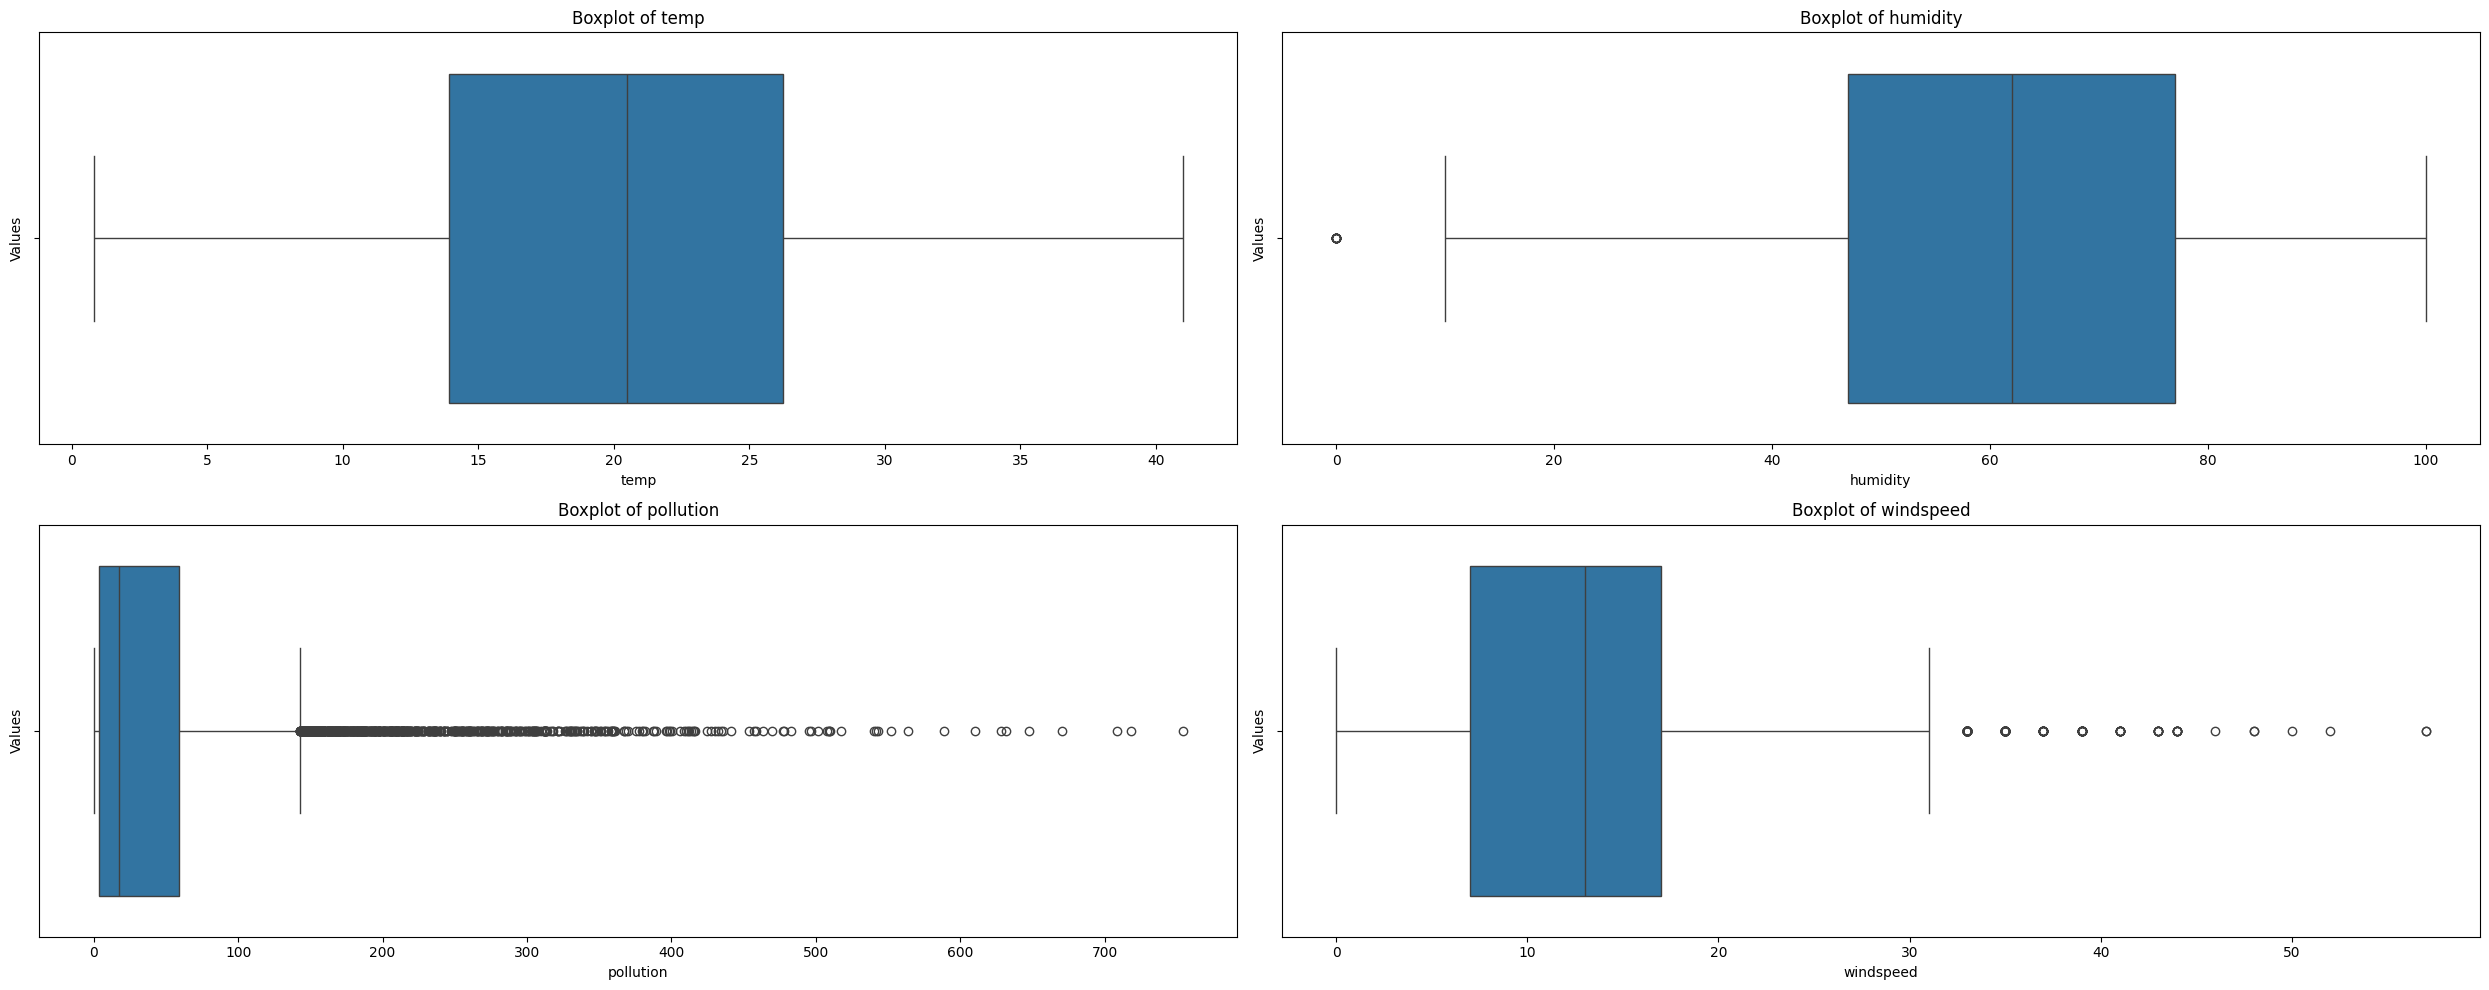

In [27]:
def boxplot_numeric(x_train):
    numeric_columns = ["temp","humidity","pollution","windspeed"]

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 10))

    # Flatten the axes for easy iteration
    axes = axes.flatten()

    # Iterate through the numeric columns and create boxplots
    for i, column in enumerate(numeric_columns):
        # Create a boxplot for the current numeric feature
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Values')
        axes[i].set_title('Boxplot of {}'.format(column))

    # Adjust spacing between subplots
    fig.tight_layout()

    # Display the plot
    plt.show()
boxplot_numeric(df)

To address the presence of outliers in the features, we will utilize a function called "replace_outliers." This function will replace outlier values with the median of their column. By adopting this approach, we can retain the examples instead of removing them.

In [28]:
def replace_outliers(x_train, numeric_columns, test=False):
    for x in numeric_columns:
        # Calculate the upper bound for outliers
        upper_limit = x_train[x].quantile(0.9995)

        lower_limit = x_train[x].quantile(0.0005)

        # Find outliers based on the upper and lower bound
        upper_outliers = x_train[x_train[x] > upper_limit]
        lower_outliers = x_train[x_train[x] < lower_limit]


        # count outliers upper and lower separatly3369*
        num_upper_outliers = len(upper_outliers[upper_outliers[x] > upper_limit])
        num_lower_outliers = len(lower_outliers[lower_outliers[x] < lower_limit])

        # Print the outliers
        if test == False:
            print(f"Number of outliers in {x}:  upper: {num_upper_outliers} lower: {num_lower_outliers} total: {num_upper_outliers+num_lower_outliers}")


        med_median = x_train[x].median()

        # Replace upper outliers with the upper bound
        x_train.loc[df[x] > upper_limit, x] = med_median

        # Replace lower outliers with the lower bound
        x_train.loc[df[x] < lower_limit, x] = med_median
    return x_train
numeric_columns = ["temp","humidity","pollution","windspeed"]
x_train = replace_outliers(x_train, numeric_columns)

Number of outliers in temp:  upper: 1 lower: 0 total: 1
Number of outliers in humidity:  upper: 0 lower: 0 total: 0
Number of outliers in pollution:  upper: 5 lower: 5 total: 10
Number of outliers in windspeed:  upper: 4 lower: 0 total: 4


Running the models for the second time after dropping "sunlight" and "atemp"

In [29]:
models_second_try = {'Random_forest': None,
          'Linear_regression': None,
          'xgboost': None}


In [30]:
models_second_try = run_models(x_train, y_train.values.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto;, score=-54.138 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto;, score=-57.884 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto;, score=-55.374 total time=   6.1s
[CV 1/3] END max_depth=None, max_features=sqrt;, score=-72.443 total time=   2.5s
[CV 2/3] END max_depth=None, max_features=sqrt;, score=-76.022 total time=   2.4s
[CV 3/3] END max_depth=None, max_features=sqrt;, score=-74.452 total time=   2.2s
[CV 1/3] END max_depth=None, max_features=log2;, score=-72.443 total time=   2.3s
[CV 2/3] END max_depth=None, max_features=log2;, score=-76.022 total time=   2.3s
[CV 3/3] END max_depth=None, max_features=log2;, score=-74.452 total time=   2.6s
[CV 1/3] END max_depth=None, max_features=0.3333333333333333;, score=-66.693 total time=   2.7s
[CV 2/3] END max_depth=None, max_features=0.3333333333333333;, score=-68.790 total time=   2.7s
[CV 3/3] END max_depth=None, max_features=0.3333333333333333;, score=-69.618 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=10, max_features=auto;, score=-61.686 total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=10, max_features=auto;, score=-63.978 total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=10, max_features=auto;, score=-63.279 total time=   4.2s
[CV 1/3] END .max_depth=10, max_features=sqrt;, score=-85.417 total time=   1.7s
[CV 2/3] END .max_depth=10, max_features=sqrt;, score=-87.595 total time=   1.5s
[CV 3/3] END .max_depth=10, max_features=sqrt;, score=-87.166 total time=   1.5s
[CV 1/3] END .max_depth=10, max_features=log2;, score=-85.417 total time=   1.4s
[CV 2/3] END .max_depth=10, max_features=log2;, score=-87.595 total time=   1.5s
[CV 3/3] END .max_depth=10, max_features=log2;, score=-87.166 total time=   1.4s
[CV 1/3] END max_depth=10, max_features=0.3333333333333333;, score=-79.577 total time=   1.7s
[CV 2/3] END max_depth=10, max_features=0.3333333333333333;, score=-81.721 total time=   2.0s
[CV 3/3] END max_depth=10, max_features=0.3333333333333333;, score=-80.691 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=20, max_features=auto;, score=-54.182 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=20, max_features=auto;, score=-57.779 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=20, max_features=auto;, score=-55.233 total time=   6.0s
[CV 1/3] END .max_depth=20, max_features=sqrt;, score=-72.545 total time=   2.6s
[CV 2/3] END .max_depth=20, max_features=sqrt;, score=-76.075 total time=   2.2s
[CV 3/3] END .max_depth=20, max_features=sqrt;, score=-74.526 total time=   2.2s
[CV 1/3] END .max_depth=20, max_features=log2;, score=-72.545 total time=   2.2s
[CV 2/3] END .max_depth=20, max_features=log2;, score=-76.075 total time=   2.2s
[CV 3/3] END .max_depth=20, max_features=log2;, score=-74.526 total time=   2.5s
[CV 1/3] END max_depth=20, max_features=0.3333333333333333;, score=-66.665 total time=   2.7s
[CV 2/3] END max_depth=20, max_features=0.3333333333333333;, score=-69.156 total time=   2.8s
[CV 3/3] END max_depth=20, max_features=0.3333333333333333;, score=-69.619 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=30, max_features=auto;, score=-54.143 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=30, max_features=auto;, score=-57.885 total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=30, max_features=auto;, score=-55.376 total time=   6.4s
[CV 1/3] END .max_depth=30, max_features=sqrt;, score=-72.387 total time=   2.2s
[CV 2/3] END .max_depth=30, max_features=sqrt;, score=-76.044 total time=   2.2s
[CV 3/3] END .max_depth=30, max_features=sqrt;, score=-74.440 total time=   2.5s
[CV 1/3] END .max_depth=30, max_features=log2;, score=-72.387 total time=   2.3s
[CV 2/3] END .max_depth=30, max_features=log2;, score=-76.044 total time=   2.2s
[CV 3/3] END .max_depth=30, max_features=log2;, score=-74.440 total time=   2.3s
[CV 1/3] END max_depth=30, max_features=0.3333333333333333;, score=-66.618 total time=   2.6s
[CV 2/3] END max_depth=30, max_features=0.3333333333333333;, score=-68.706 total time=   3.0s
[CV 3/3] END max_depth=30, max_features=0.3333333333333333;, score=-69.627 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-87.414 total time=   0.1s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-87.121 total time=   0.1s
[CV 3/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-87.099 total time=   0.1s
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-60.651 total time=   0.1s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-57.950 total time=   0.1s
[CV 3/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-59.669 total time=   0.1s
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=7, objective=reg:squarederror;, score=-48.690 total time=   0.2s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_dep

In [31]:
cv_scores = {}
cv_scores['Random forest'] = models_second_try['Random forest'].best_score_
cv_scores['xgboost'] = models_second_try['xgboost'].best_score_
cv_scores['Linear regression'] = models_second_try['Linear regression'][1].mean()
cv_scores

{'Random forest': -55.731259850175626,
 'xgboost': -44.80698084472933,
 'Linear regression': -122.57255389223171}

The xgboost score improved slightly

Converting periodic variables to sin. This is an effective way to represent and capture cyclical patterns in data. The sine function not only facilitates a more efficient representation of periodic behaviors but also contributes to improving model stability and achieving better generalization from the data.

In [32]:
x_train['rent_hour_sin'] = np.sin(x_train['rent_hour'])
x_train['day_of_week_sin'] = np.sin(x_train['day_of_week'])
x_train['season_sin'] = np.sin(x_train['season'])
x_train['month_sin'] = np.sin(x_train['month'])
x_train

,season,holiday,workingday,weather,temp,humidity,windspeed,pollution,traffic,rent_hour,day_of_week,month,year,rent_hour_sin,day_of_week_sin,season_sin,month_sin
0,3,0,1,1,28.70,65,12.9980,5.354100,0.000000,0,0,7,2011,0.000000,0.000000,0.141120,0.656987
1,2,0,1,1,22.96,52,22.0028,85.425233,0.004489,22,4,5,2012,-0.008851,-0.756802,0.909297,-0.958924
2,2,0,1,1,12.30,61,6.0032,2.040899,0.000242,23,4,4,2011,-0.846220,-0.756802,0.909297,-0.756802
3,3,0,0,1,23.78,60,8.9981,26.682772,0.004489,9,6,9,2012,0.412118,-0.279415,0.141120,0.412118
4,1,0,1,3,8.20,93,12.9980,5.851754,0.000000,23,1,2,2011,-0.846220,0.841471,0.841471,0.909297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,1,0,0,1,6.56,47,11.0014,14.953355,0.004489,2,5,1,2012,0.909297,-0.958924,0.841471,0.841471
8160,4,0,0,1,11.48,61,19.0012,7.977025,0.000000,9,5,12,2011,0.412118,-0.958924,-0.756802,-0.536573
8161,4,0,0,1,11.48,48,16.9979,6.916512,0.015615,16,6,12,2011,-0.287903,-0.279415,-0.756802,-0.536573
8162,1,0,0,1,15.58,17,35.0008,0.095445,0.000242,7,5,2,2011,0.656987,-0.958924,0.841471,0.909297


Plotting feature importance with random forest in order to see what are the most contributing features to rf model

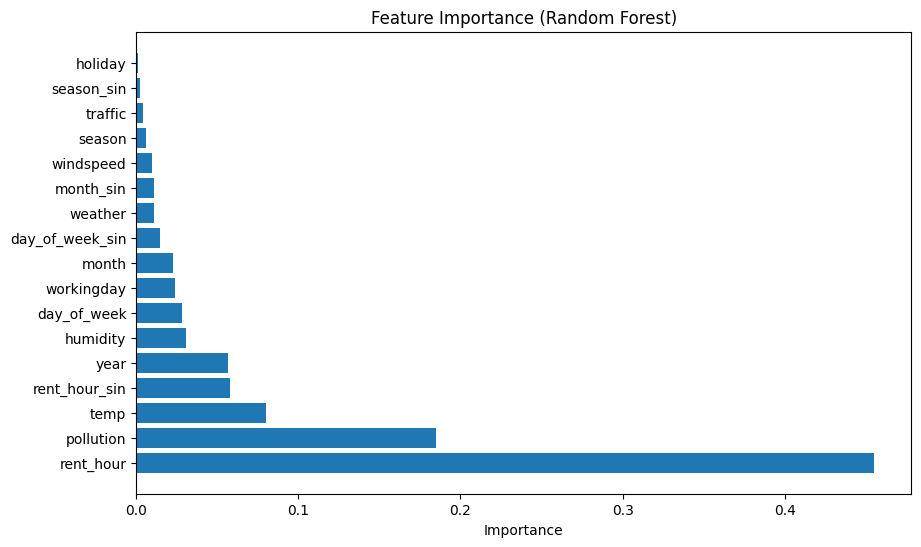

In [33]:
def random_forest_calculate_and_plot_feature_importance(x_train, y_train, model=None, plot=True, top_n=None, figsize=(10, 6)):

    # Ensure y_train is a 1D array
    y_train = np.ravel(y_train)

    # Initialize or use the provided model
    if model is None:
        model = RandomForestRegressor()

    # Train the model
    model.fit(x_train, y_train)

    # Extract feature importances
    feature_importances = model.feature_importances_

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

    # Sort features by importance in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Select top_n features if specified
    if top_n is not None:
        importance_df = importance_df.head(top_n)

     # Create a list of strings with feature names and scores
    feature_list = [f"{feature}-{score:.4f}" for feature, score in zip(importance_df['Feature'], importance_df['Importance'])]

    # Plot feature importance if requested
    if plot:
        plt.figure(figsize=figsize)
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel('Importance')
        plt.title('Feature Importance (Random Forest)')
        plt.show()

    return importance_df, model, feature_list

importance_df, trained_model, feature_lst_random_forest = random_forest_calculate_and_plot_feature_importance(x_train, y_train)


In [34]:
x_train_random_importance = drop_features(x_train,['holiday','season_sin','traffic','season'])

In [35]:
x_train_random_importance

,workingday,weather,temp,humidity,windspeed,pollution,rent_hour,day_of_week,month,year,rent_hour_sin,day_of_week_sin,month_sin
0,1,1,28.70,65,12.9980,5.354100,0,0,7,2011,0.000000,0.000000,0.656987
1,1,1,22.96,52,22.0028,85.425233,22,4,5,2012,-0.008851,-0.756802,-0.958924
2,1,1,12.30,61,6.0032,2.040899,23,4,4,2011,-0.846220,-0.756802,-0.756802
3,0,1,23.78,60,8.9981,26.682772,9,6,9,2012,0.412118,-0.279415,0.412118
4,1,3,8.20,93,12.9980,5.851754,23,1,2,2011,-0.846220,0.841471,0.909297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,0,1,6.56,47,11.0014,14.953355,2,5,1,2012,0.909297,-0.958924,0.841471
8160,0,1,11.48,61,19.0012,7.977025,9,5,12,2011,0.412118,-0.958924,-0.536573
8161,0,1,11.48,48,16.9979,6.916512,16,6,12,2011,-0.287903,-0.279415,-0.536573
8162,0,1,15.58,17,35.0008,0.095445,7,5,2,2011,0.656987,-0.958924,0.909297


In [36]:
random_forest_sec=random_forest(x_train_random_importance, y_train.values.ravel())


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto;, score=-55.914 total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto;, score=-56.694 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto;, score=-55.729 total time=   6.6s
[CV 1/3] END max_depth=None, max_features=sqrt;, score=-62.120 total time=   2.4s
[CV 2/3] END max_depth=None, max_features=sqrt;, score=-63.589 total time=   2.6s
[CV 3/3] END max_depth=None, max_features=sqrt;, score=-63.779 total time=   2.4s
[CV 1/3] END max_depth=None, max_features=log2;, score=-62.120 total time=   2.3s
[CV 2/3] END max_depth=None, max_features=log2;, score=-63.589 total time=   2.4s
[CV 3/3] END max_depth=None, max_features=log2;, score=-63.779 total time=   2.3s
[CV 1/3] END max_depth=None, max_features=0.3333333333333333;, score=-58.608 total time=   5.3s
[CV 2/3] END max_depth=None, max_features=0.3333333333333333;, score=-60.133 total time=   4.5s
[CV 3/3] END max_depth=None, max_features=0.3333333333333333;, score=-59.667 total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=10, max_features=auto;, score=-63.378 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=10, max_features=auto;, score=-63.084 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=10, max_features=auto;, score=-63.740 total time=   4.8s
[CV 1/3] END .max_depth=10, max_features=sqrt;, score=-75.498 total time=   1.5s
[CV 2/3] END .max_depth=10, max_features=sqrt;, score=-76.878 total time=   1.5s
[CV 3/3] END .max_depth=10, max_features=sqrt;, score=-76.389 total time=   1.5s
[CV 1/3] END .max_depth=10, max_features=log2;, score=-75.498 total time=   1.5s
[CV 2/3] END .max_depth=10, max_features=log2;, score=-76.878 total time=   1.6s
[CV 3/3] END .max_depth=10, max_features=log2;, score=-76.389 total time=   1.8s
[CV 1/3] END max_depth=10, max_features=0.3333333333333333;, score=-72.176 total time=   1.9s
[CV 2/3] END max_depth=10, max_features=0.3333333333333333;, score=-71.549 total time=   1.9s
[CV 3/3] END max_depth=10, max_features=0.3333333333333333;, score=-71.876 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=20, max_features=auto;, score=-55.831 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=20, max_features=auto;, score=-56.602 total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=20, max_features=auto;, score=-55.674 total time=   6.7s
[CV 1/3] END .max_depth=20, max_features=sqrt;, score=-62.157 total time=   2.3s
[CV 2/3] END .max_depth=20, max_features=sqrt;, score=-63.884 total time=   2.3s
[CV 3/3] END .max_depth=20, max_features=sqrt;, score=-63.135 total time=   2.5s
[CV 1/3] END .max_depth=20, max_features=log2;, score=-62.157 total time=   2.5s
[CV 2/3] END .max_depth=20, max_features=log2;, score=-63.884 total time=   2.3s
[CV 3/3] END .max_depth=20, max_features=log2;, score=-63.135 total time=   2.9s
[CV 1/3] END max_depth=20, max_features=0.3333333333333333;, score=-58.279 total time=   3.1s
[CV 2/3] END max_depth=20, max_features=0.3333333333333333;, score=-59.434 total time=   3.1s
[CV 3/3] END max_depth=20, max_features=0.3333333333333333;, score=-58.823 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=30, max_features=auto;, score=-55.910 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=30, max_features=auto;, score=-56.700 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=30, max_features=auto;, score=-55.736 total time=   6.8s
[CV 1/3] END .max_depth=30, max_features=sqrt;, score=-62.053 total time=   2.4s
[CV 2/3] END .max_depth=30, max_features=sqrt;, score=-63.544 total time=   2.3s
[CV 3/3] END .max_depth=30, max_features=sqrt;, score=-63.702 total time=   2.3s
[CV 1/3] END .max_depth=30, max_features=log2;, score=-62.053 total time=   2.7s
[CV 2/3] END .max_depth=30, max_features=log2;, score=-63.544 total time=   2.3s
[CV 3/3] END .max_depth=30, max_features=log2;, score=-63.702 total time=   2.3s
[CV 1/3] END max_depth=30, max_features=0.3333333333333333;, score=-58.625 total time=   2.7s
[CV 2/3] END max_depth=30, max_features=0.3333333333333333;, score=-60.143 total time=   2.8s
[CV 3/3] END max_depth=30, max_features=0.3333333333333333;, score=-59.662 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [37]:
random_forest_sec.best_score_

-56.035491708672744

It didn't imporve the score

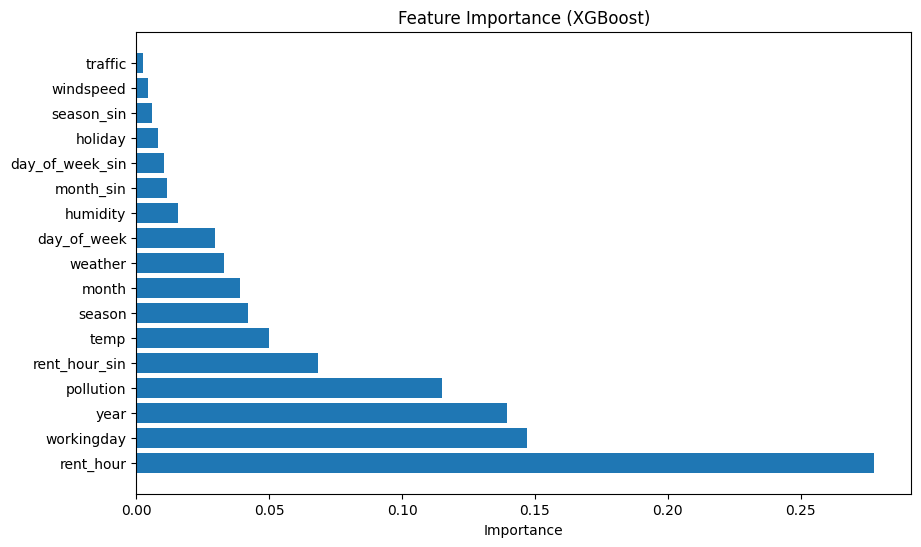

In [38]:
def xgboost_calculate_and_plot_feature_importance(x_train, y_train, model=None, plot=True, top_n=None, figsize=(10, 6)):
    """
    Train an XGBoostRegressor model, extract feature importances, and plot the results.

    Parameters:
    - x_train: Feature matrix (DataFrame)
    - y_train: Target variable (Series or 1D array)
    - model: Optional, pre-initialized XGBoostRegressor model (default is None, creates a new model)
    - plot: Whether to plot the feature importance (default is True)
    - top_n: Number of top features to display in the plot (default is None, which shows all features)
    - figsize: Tuple specifying the size of the plot (default is (10, 6))

    Returns:
    - importance_df: DataFrame containing feature names and their importance scores
    - model: Trained XGBoostRegressor model
    """

    # Ensure y_train is a 1D array
    y_train = np.ravel(y_train)

    # Initialize or use the provided model
    if model is None:
        model = xgb.XGBRegressor()

    # Train the model
    model.fit(x_train, y_train)

    # Extract feature importances
    feature_importances = model.feature_importances_

    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

    # Sort features by importance in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Select top_n features if specified
    if top_n is not None:
        importance_df = importance_df.head(top_n)

    # Create a list of strings with feature names and scores
    feature_list = [f"{feature}-{score:.4f}" for feature, score in zip(importance_df['Feature'], importance_df['Importance'])]

    # Plot feature importance if requested
    if plot:
        plt.figure(figsize=figsize)
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel('Importance')
        plt.title('Feature Importance (XGBoost)')
        plt.show()

    return importance_df, model, feature_list

# Example usage
importance_df, trained_model, feature_lst_xgboost = xgboost_calculate_and_plot_feature_importance(x_train, y_train)


In [39]:
x_train_XG_importance = drop_features(x_train,['traffic','season_sin','windspeed','month_sin'])

In [40]:
XG_sec=xgboost(x_train_XG_importance, y_train.values.ravel())

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-86.409 total time=   0.1s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-86.217 total time=   0.1s
[CV 3/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-84.810 total time=   0.1s
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-60.807 total time=   0.1s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-58.500 total time=   0.1s
[CV 3/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-59.873 total time=   0.1s
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=7, objective=reg:squarederror;, score=-50.630 total time=   0.2s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_dep

In [41]:
XG_sec.best_score_

-45.291757843790236

The last manipulations of adding the sine function and the importance feature did not improve the results

In [42]:
x_train= drop_features(x_train,['rent_hour_sin','season_sin','day_of_week_sin','month_sin'])

linear regression feature importance

In [43]:

def get_feature_importance_linear(x_train, y_train):
    # Create a linear regression model
    model = LinearRegression()

    # Initialize an empty list to store feature names
    feature_names = []

    # Iterate through each column in x_train
    for column in x_train.columns:
        # Extract the current feature as a 1-dimensional array
        feature = x_train[column].values.reshape(-1, 1)

        # Fit the model to the current feature and y_train
        model.fit(feature, y_train)

        # Get the coefficient for the current feature
        coefficient = model.coef_[0]

        # Append the feature name to the list
        feature_names.append((column, abs(coefficient)))

    # Sort the features based on their absolute coefficients in descending order
    feature_names = sorted(feature_names, key=lambda x: x[1], reverse=True)

    # Extract only the feature names
    feature_names = [feature[0] for feature in feature_names]

    return feature_names


linear_regression_feature_lst = get_feature_importance_linear(x_train, y_train)



## Categorizaion

Choosing to apply one-hot encoding on ordinal categorical variables in Random Forest and XGBoost(the highest score models), even though these models inherently handle categorical features, can be a strategic decision. One-hot encoding enhances the models' ability to capture and utilize the ordinal relationships within the data, potentially leading to improved overall performance. This approach allows the algorithms to better interpret and utilize the ordinal information, contributing to more accurate predictions.

In [44]:
encoded_data = pd.get_dummies(x_train, columns=['season', 'weather','rent_hour','day_of_week','year'])
encoded_data

,holiday,workingday,temp,humidity,windspeed,pollution,traffic,month,season_1,season_2,...,rent_hour_23,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,year_2011,year_2012
0,0,1,28.70,65,12.9980,5.354100,0.000000,7,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,22.96,52,22.0028,85.425233,0.004489,5,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,1,12.30,61,6.0032,2.040899,0.000242,4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,0,0,23.78,60,8.9981,26.682772,0.004489,9,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,1,8.20,93,12.9980,5.851754,0.000000,2,1,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,0,0,6.56,47,11.0014,14.953355,0.004489,1,1,0,...,0,0,0,0,0,0,1,0,0,1
8160,0,0,11.48,61,19.0012,7.977025,0.000000,12,0,0,...,0,0,0,0,0,0,1,0,1,0
8161,0,0,11.48,48,16.9979,6.916512,0.015615,12,0,0,...,0,0,0,0,0,0,0,1,1,0
8162,0,0,15.58,17,35.0008,0.095445,0.000242,2,1,0,...,0,0,0,0,0,0,1,0,1,0


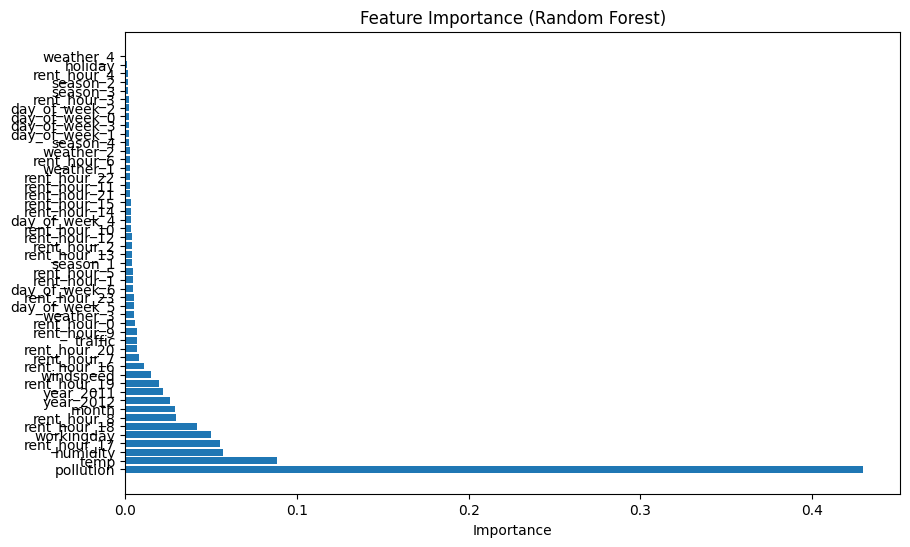

In [45]:
importance_df, trained_model ,encoded_feature_lst_random = random_forest_calculate_and_plot_feature_importance(encoded_data, y_train)

In [46]:
encoded_data_rf = drop_features(encoded_data,['weather_4',
 'holiday',
 'rent_hour_4',
 'season_2',
 'season_3',
 'rent_hour_3',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_1',
 'day_of_week_0',
 'season_4',
 'weather_1',
 'rent_hour_6',
 'weather_2',
 'rent_hour_22',
 'rent_hour_21',
 'rent_hour_11',
 'rent_hour_15',
 'rent_hour_10',
 'day_of_week_4',
 'rent_hour_14',
 'rent_hour_12',
 'rent_hour_2',
 'rent_hour_13',
 'season_1',
 'rent_hour_5',
 'day_of_week_6',
 'weather_3',
 'rent_hour_23',
 'rent_hour_1'])

In [47]:
rf_encoded=random_forest(encoded_data_rf, y_train.values.ravel())

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END max_depth=None, max_features=auto;, score=-80.462 total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END max_depth=None, max_features=auto;, score=-81.195 total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END max_depth=None, max_features=auto;, score=-85.243 total time=   6.5s
[CV 1/3] END max_depth=None, max_features=sqrt;, score=-79.600 total time=   2.2s
[CV 2/3] END max_depth=None, max_features=sqrt;, score=-79.802 total time=   2.6s
[CV 3/3] END max_depth=None, max_features=sqrt;, score=-81.103 total time=   2.2s
[CV 1/3] END max_depth=None, max_features=log2;, score=-79.600 total time=   2.2s
[CV 2/3] END max_depth=None, max_features=log2;, score=-79.802 total time=   2.2s
[CV 3/3] END max_depth=None, max_features=log2;, score=-81.103 total time=   2.2s
[CV 1/3] END max_depth=None, max_features=0.3333333333333333;, score=-79.383 total time=   3.1s
[CV 2/3] END max_depth=None, max_features=0.3333333333333333;, score=-78.846 total time=   2.8s
[CV 3/3] END max_depth=None, max_features=0.3333333333333333;, score=-80.789 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=10, max_features=auto;, score=-88.013 total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=10, max_features=auto;, score=-87.571 total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=10, max_features=auto;, score=-92.478 total time=   3.8s
[CV 1/3] END .max_depth=10, max_features=sqrt;, score=-89.668 total time=   1.3s
[CV 2/3] END .max_depth=10, max_features=sqrt;, score=-88.955 total time=   1.8s
[CV 3/3] END .max_depth=10, max_features=sqrt;, score=-91.396 total time=   1.9s
[CV 1/3] END .max_depth=10, max_features=log2;, score=-89.668 total time=   1.4s
[CV 2/3] END .max_depth=10, max_features=log2;, score=-88.955 total time=   1.5s
[CV 3/3] END .max_depth=10, max_features=log2;, score=-91.396 total time=   1.6s
[CV 1/3] END max_depth=10, max_features=0.3333333333333333;, score=-88.208 total time=   1.5s
[CV 2/3] END max_depth=10, max_features=0.3333333333333333;, score=-86.598 total time=   1.6s
[CV 3/3] END max_depth=10, max_features=0.3333333333333333;, score=-89.118 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=20, max_features=auto;, score=-80.507 total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=20, max_features=auto;, score=-81.314 total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=20, max_features=auto;, score=-85.175 total time=   6.2s
[CV 1/3] END .max_depth=20, max_features=sqrt;, score=-79.512 total time=   2.1s
[CV 2/3] END .max_depth=20, max_features=sqrt;, score=-79.504 total time=   2.1s
[CV 3/3] END .max_depth=20, max_features=sqrt;, score=-80.846 total time=   2.4s
[CV 1/3] END .max_depth=20, max_features=log2;, score=-79.512 total time=   2.1s
[CV 2/3] END .max_depth=20, max_features=log2;, score=-79.504 total time=   2.1s
[CV 3/3] END .max_depth=20, max_features=log2;, score=-80.846 total time=   2.1s
[CV 1/3] END max_depth=20, max_features=0.3333333333333333;, score=-79.538 total time=   2.6s
[CV 2/3] END max_depth=20, max_features=0.3333333333333333;, score=-79.166 total time=   3.0s
[CV 3/3] END max_depth=20, max_features=0.3333333333333333;, score=-80.938 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END .max_depth=30, max_features=auto;, score=-80.652 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END .max_depth=30, max_features=auto;, score=-81.093 total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END .max_depth=30, max_features=auto;, score=-85.228 total time=   6.8s
[CV 1/3] END .max_depth=30, max_features=sqrt;, score=-79.635 total time=   2.3s
[CV 2/3] END .max_depth=30, max_features=sqrt;, score=-79.606 total time=   2.3s
[CV 3/3] END .max_depth=30, max_features=sqrt;, score=-81.060 total time=   2.2s
[CV 1/3] END .max_depth=30, max_features=log2;, score=-79.635 total time=   2.4s
[CV 2/3] END .max_depth=30, max_features=log2;, score=-79.606 total time=   2.4s
[CV 3/3] END .max_depth=30, max_features=log2;, score=-81.060 total time=   2.3s
[CV 1/3] END max_depth=30, max_features=0.3333333333333333;, score=-79.329 total time=   2.7s
[CV 2/3] END max_depth=30, max_features=0.3333333333333333;, score=-78.857 total time=   2.8s
[CV 3/3] END max_depth=30, max_features=0.3333333333333333;, score=-80.568 total time=   3.1s


In [48]:
rf_encoded.best_score_

-79.58476282826993

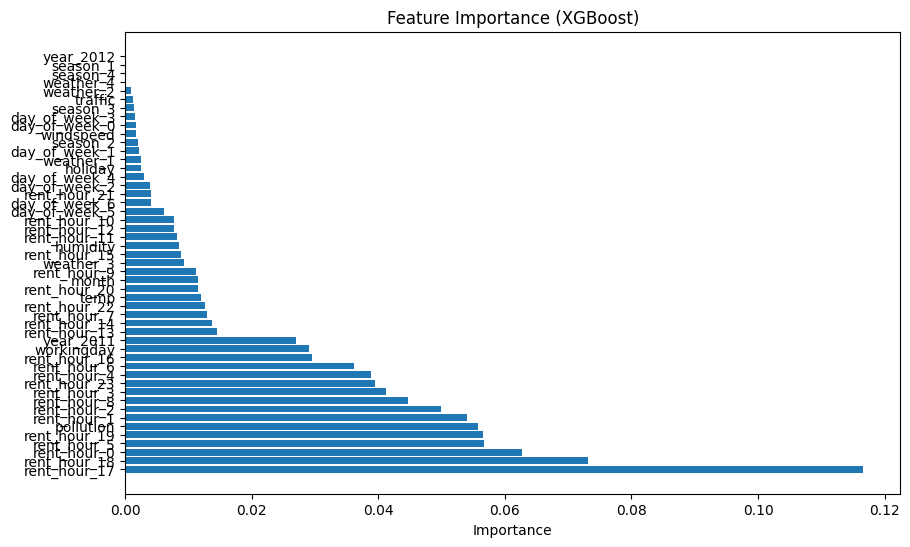

In [49]:
importance_df, trained_model, encoded_feature_lst_xgboost = xgboost_calculate_and_plot_feature_importance(encoded_data, y_train.values.ravel())

In [50]:
XG_importance_feature_list= []
for feature in importance_df['Feature']:
    XG_importance_feature_list.append(feature)


In [51]:
XG_importance_feature_list

['rent_hour_17',
 'rent_hour_18',
 'rent_hour_0',
 'rent_hour_5',
 'rent_hour_19',
 'pollution',
 'rent_hour_1',
 'rent_hour_2',
 'rent_hour_8',
 'rent_hour_3',
 'rent_hour_23',
 'rent_hour_4',
 'rent_hour_6',
 'rent_hour_16',
 'workingday',
 'year_2011',
 'rent_hour_13',
 'rent_hour_14',
 'rent_hour_7',
 'rent_hour_22',
 'temp',
 'rent_hour_20',
 'month',
 'rent_hour_9',
 'weather_3',
 'rent_hour_15',
 'humidity',
 'rent_hour_11',
 'rent_hour_12',
 'rent_hour_10',
 'day_of_week_5',
 'day_of_week_6',
 'rent_hour_21',
 'day_of_week_2',
 'day_of_week_4',
 'holiday',
 'weather_1',
 'day_of_week_1',
 'season_2',
 'windspeed',
 'day_of_week_0',
 'day_of_week_3',
 'season_3',
 'traffic',
 'weather_2',
 'weather_4',
 'season_4',
 'season_1',
 'year_2012']

In [52]:
encoded_data_xg = drop_features(encoded_data,['year_2012',
 'weather_4',
 'season_1',
 'season_4',
 'traffic',
 'weather_2',
 'season_2',
 'windspeed',
 'day_of_week_3',
 'day_of_week_1',
 'weather_1',
 'day_of_week_0',
 'holiday',
 'season_3',
 'day_of_week_2',
 'day_of_week_4',
 'day_of_week_6',
 'rent_hour_15',
 'rent_hour_21',
 'day_of_week_5',
 'rent_hour_14',
 'rent_hour_20',
 'rent_hour_10',
 'rent_hour_13',
 'weather_3',
 'humidity',
 'rent_hour_11',
 'month',
 'temp',
 'rent_hour_12'])

In [53]:
XG_encoded= xgboost(encoded_data_xg,y_train.values.ravel())

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-106.896 total time=   0.1s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-106.333 total time=   0.1s
[CV 3/3] END eval_metric=rmse, learning_rate=0.05, max_depth=3, objective=reg:squarederror;, score=-108.590 total time=   0.1s
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-98.291 total time=   0.1s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-97.893 total time=   0.1s
[CV 3/3] END eval_metric=rmse, learning_rate=0.05, max_depth=5, objective=reg:squarederror;, score=-100.031 total time=   0.1s
[CV 1/3] END eval_metric=rmse, learning_rate=0.05, max_depth=7, objective=reg:squarederror;, score=-94.432 total time=   0.1s
[CV 2/3] END eval_metric=rmse, learning_rate=0.05, max

In [54]:
XG_encoded.best_score_

-91.02328833670407

The categorization process did not improve the results



# Evaluating on test set

In [55]:
def test_manipulations(x_test):
  x_test =  datetime_to_numerical(x_test)
  x_test = drop_features(x_test,['atemp','sunlight'])
  return x_test


In [56]:
modified_x_test = test_manipulations(x_test)

In [57]:
def evaluate_single_model(x, y, model):
    y_pred = model.predict(x)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return rmse



In [58]:
linear_regression_model, cv = models_second_try['Linear regression']

In [59]:
final_rmse_xgboost = evaluate_single_model(modified_x_test, y_test, models_second_try['xgboost'].best_estimator_)
final_rmse_random_forest = evaluate_single_model(modified_x_test, y_test, models_second_try['Random forest'].best_estimator_)
final_rmse_linear = evaluate_single_model(modified_x_test, y_test, linear_regression_model)

# Checking the runtime

In [60]:
# Record the end time
end_time = time.time()
# Calculate the runtime
runtime = end_time - start_time

In [61]:
results = {'model': ['XGboost', 'Random Forest', 'Linear Regression'],
           'Score (RMSE)': [f'{final_rmse_xgboost}', f'{final_rmse_random_forest}', f'{final_rmse_linear}'],
           'Hyperparams used': [f"{models_second_try['xgboost'].best_estimator_}", f"{models_second_try['Random forest'].best_estimator_}", 'no hyperparameters'],
           'Features dropped': [['atemp','sunlight'] , ['atemp','sunlight'] , ['atemp','sunlight'] ],
           'New features created': [['rent_hour','day_of_week','month', 'year'], ['rent_hour','day_of_week','month', 'year'],  ['rent_hour','day_of_week','month', 'year']],
           'Runtime trainining + inference (seconds)': [[f'{runtime}'], [f'{runtime}'], [f'{runtime}']],
           'Hardware used (GPU/CPU/TPU)': ['GPU', 'GPU', 'GPU'],
           'Explainability (top 3 features)': [f'{feature_lst_xgboost[:3]}', f'{feature_lst_random_forest[:3]}', [f'{linear_regression_feature_lst[:3]}']]
           }
results_csv = pd.DataFrame(results)
results_csv

,model,Score (RMSE),Hyperparams used,Features dropped,New features created,Runtime trainining + inference (seconds),Hardware used (GPU/CPU/TPU),Explainability (top 3 features)
0,XGboost,40.819004930021286,"XGBRegressor(base_score=None, booster=None, ca...","[atemp, sunlight]","[rent_hour, day_of_week, month, year]",[713.4519431591034],GPU,"['rent_hour-0.2777', 'workingday-0.1472', 'yea..."
1,Random Forest,47.15455088752998,"RandomForestRegressor(max_depth=20, max_featur...","[atemp, sunlight]","[rent_hour, day_of_week, month, year]",[713.4519431591034],GPU,"['rent_hour-0.4553', 'pollution-0.1847', 'temp..."
2,Linear Regression,118.4649698443016,no hyperparameters,"[atemp, sunlight]","[rent_hour, day_of_week, month, year]",[713.4519431591034],GPU,"[['traffic', 'year', 'weather']]"


In [62]:
path_to_save = '/content/drive/My Drive/Colab Notebooks/Exercise_1'
results_csv.to_csv(os.path.join(path_to_save, 'exercise1.csv'))